## Q1-2. Singular Value Decomposition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
class SingularValueDecomposition:
    def __init__(self, n_singular_values):
        self.n_singular_values_ = n_singular_values
        self.U_ = None
        self.V_ = None
        self.S_ = None

    def fit(self, X):
        X_T_X = np.dot(X.T, X)
        eigenvalues, eigenvectors = np.linalg.eig(X_T_X)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, idx]
        self.V_ = eigenvectors[:, :self.n_singular_values_]
        X_X_T = np.dot(X, X.T)
        eigenvalues, eigenvectors = np.linalg.eig(X_X_T)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        self.U_ = eigenvectors[:, :self.n_singular_values_]
        self.S_ = np.sqrt(eigenvalues[:self.n_singular_values_])
        return self.U_, self.S_, self.V_.T

    def get_original_matrix(self):
        S_diagonal = np.diag(self.S_)
        A = np.dot(np.dot(self.U_, S_diagonal), self.V_.T)
        return A

    def plot(self, y):
        df = pd.DataFrame(np.hstack((np.real(self.U_), y.reshape(-1, 1))))
        class_0 = df[df[2] == 0].values
        class_1 = df[df[2] == 1].values
        class_2 = df[df[2] == 2].values
        plt.scatter(x=class_0[:,0], y=class_0[:,1], color='red')
        plt.scatter(x=class_1[:,0], y=class_1[:,1], color='green')
        plt.scatter(x=class_2[:,0], y=class_2[:,1], color='blue')
        txt = "Red - Class 0\nGreen - Class 1\nBlue - Class 2"
        plt.figtext(0.4, -0.1, txt, wrap=True, horizontalalignment='left', fontsize=12)
        plt.show()

In [3]:
X, y = load_iris(return_X_y=True)
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
svd = SingularValueDecomposition(n_singular_values=2)
X_U, X_S, X_V = svd.fit(X)

In [5]:
X_U[:5]

array([[ 0.06161685+0.j, -0.12961144+0.j],
       [ 0.05807094+0.j, -0.11101978+0.j],
       [ 0.05676305+0.j, -0.11796647+0.j],
       [ 0.05665344+0.j, -0.10530815+0.j],
       [ 0.0612302 +0.j, -0.13108979+0.j]])

In [6]:
X_V

array([[ 0.75110816,  0.38008617,  0.51300886,  0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081]])

In [7]:
X_S

array([95.95991387+0.j, 17.76103366+0.j])

In [8]:
X_new = svd.get_original_matrix()
X_new[:5]

array([[3.78693258+0.j, 0.98872943+0.j, 4.66466101+0.j, 1.78393642+0.j],
       [3.62519358+0.j, 1.0399385 +0.j, 4.25609603+0.j, 1.61332082+0.j],
       [3.49586393+0.j, 0.92477813+0.j, 4.27914601+0.j, 1.63464977+0.j],
       [3.5518536 +0.j, 1.04370227+0.j, 4.11442495+0.j, 1.55561804+0.j],
       [3.75160324+0.j, 0.96027154+0.j, 4.66423463+0.j, 1.78673043+0.j]])

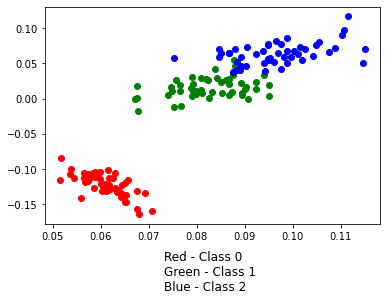

In [9]:
svd.plot(y)